# JetRail Time series Forecasting

## About the company

"Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed!" 

## Probleme Statement

"This investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months." 

## Hypothesis Generation 

Here are some factors which might affect the passengers number on the JetRail. 

- Population has a general upward trend with time and more people to travel by JetRail. So there will be an increase in the traffic as the years pass by

- The traffic will be high from May to October: because tourists visits generally increases during this time period.

- Traffic on weekdays will be more as compared to weekends/holidays: All the people will go to office on weekdays then the traffic will be more

- Traffic during the peak hours will be high: as people will travel to work and college.

## Loading modules 

In [443]:
import pandas as pd          
import seaborn as sns
sns.set()
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

## Data 

We have 2 .csv files: 
- Train file: will be used for training our model. Contains independent variables + the target
- Test file: contains only the independant variables. We will apply the modele to predict the target for these data. 
- We will work on the train file for the analysis and will use the test file for forecasting.


## Reading the data 

In [444]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

Let's make a copy of the files to keep the original datasets unchanged 

In [445]:
train_original=train.copy() 
test_original=test.copy()


## Exploratory Data Analysis EDA

### Dataset structure and content

Let's check the features first 

In [446]:
import pandas_profiling

#train.profile_report()

No missing values

In [447]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


Variable description:

In the train file we have 3 features: 
- ID which is the unique number given to each observation
- Datetime which is the time of each observation  
- Count of passengers corresponding to each datetime

In the test file: we have ID and Datetime only so we have to predict the Count.

ID and Count are in integer format while the Datetime is in object format.

In [448]:
print(train.dtypes,'\n\n',test.dtypes)

ID           int64
Datetime    object
Count        int64
dtype: object 

 ID           int64
Datetime    object
dtype: object


The shape of the dataset:

- We have 18288 different records for the Count of passengers in train set and 5112 in test set.

In [449]:
print(train.shape, test.shape)

(18288, 3) (5112, 2)


### Feature extraction

Here we will extract the time and date from the Datetime. 
As the data type of Datetime is object, we have first to change the data type to datetime format to be able to extract features from it.

Date and time format 25-08-2012 00:00 

In [450]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 


Let's extract hour, day, month and year from the Datetime, to analyze their possible effect on the passenger count.


In [451]:
for i in (train, test):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

Let’s make a weekend variable to visualize the impact of weekend on traffic.
We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.


It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. Then Values of 5 and 6 represents the weekend days.


As we want to know only if the day is a weekday or a weekend day. We will assign 0 to the former and 1 to the latter

In [452]:
train['Day']=train.Datetime.dt.dayofweek

In [453]:
train['Weekend']=train.apply(lambda row: 1 if row.Day==5 or row.Day==6 else 0,axis=1)

In [454]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,Day,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


### Time series visualization

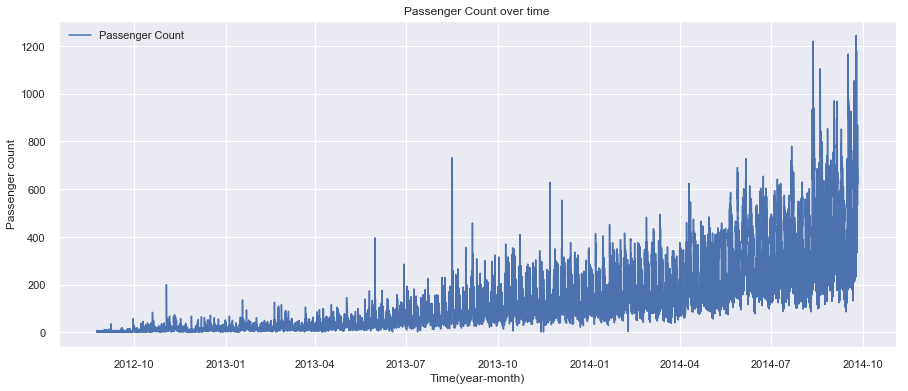

In [455]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
Count = train['Count'] 
plt.figure(figsize=(15,6)) 
plt.plot(Count, label='Passenger Count') 
plt.title('Passenger Count over time') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

As we can see, there is an increasing trend in the series. 
We can also see peaks, which can be due to some event leading to a high traffic.

## Exploratory Data Analysis (EDA)

Hypothesis Reminder: 
- Traffic will increase over time
- Traffic will be high from May to October
- Traffic will be higher on weekdays
- Traffic will be higher during the peak hours.

### Yearly Passenger Count

We see an exponential growth in the traffic over the years which validates our first hypothesis.

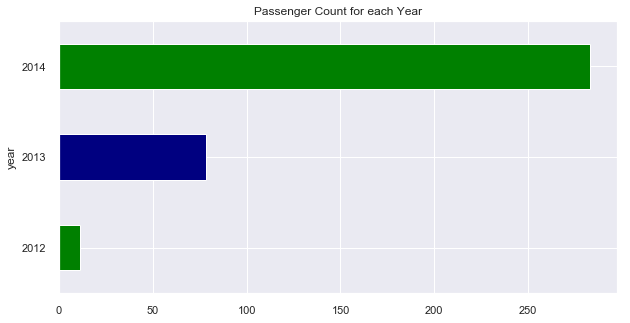

In [456]:
train.groupby('year')['Count'].mean().plot.barh(figsize=(10,5), color=['green','navy'], title='Passenger Count for each Year')


### Monthly Passenger Count 

However for the mean passenger count over the years, we notice that high decrease in the mean of passenger count in last three months, which sounds weird. Let’s look at the monthly mean of each year.

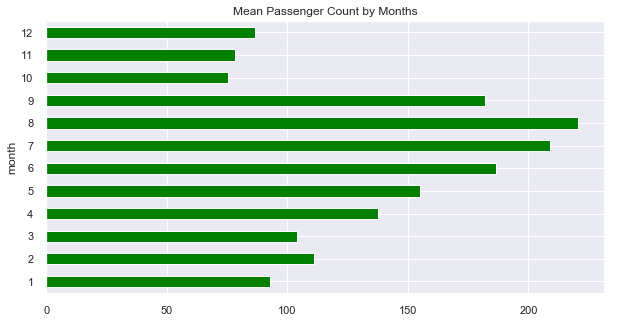

In [457]:
train.groupby('month')['Count'].mean().plot.barh(figsize=(10,5), color=['green'],title='Mean Passenger Count by Months')


We see a significant growth in the traffic between April and September 

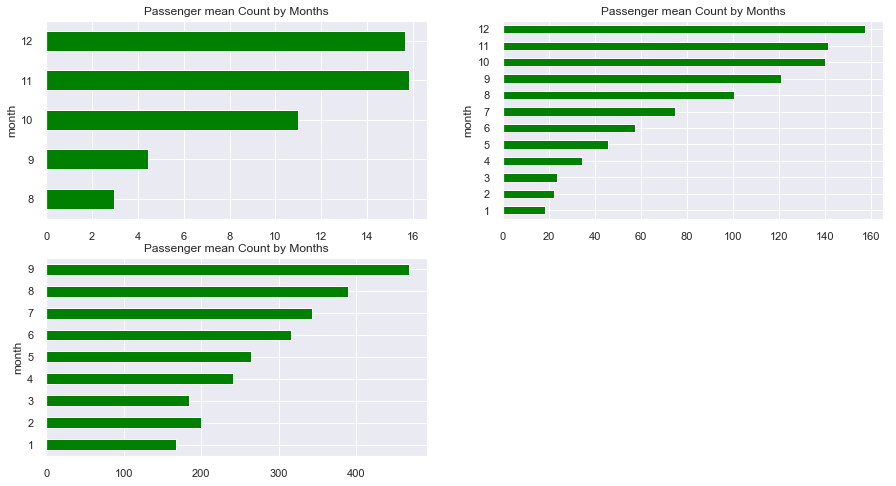

In [458]:
plt.figure() 
plt.subplot(221) 
train[train.year==2012].groupby('month')['Count'].mean().plot.barh(figsize=(15,8), color=['green'],title='Passenger mean Count by Months')
plt.subplot(222) 
train[train.year==2013].groupby('month')['Count'].mean().plot.barh( color=['green'],title='Passenger mean Count by Months')
plt.subplot(223) 
train[train.year==2014].groupby('month')['Count'].mean().plot.barh(color=['green'],title='Passenger mean Count by Months')
plt.show()

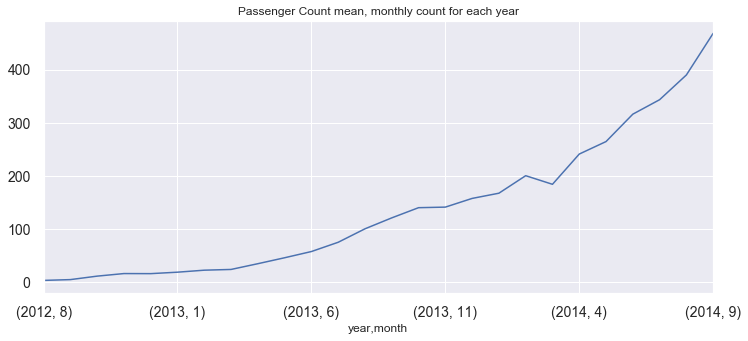

In [459]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(12,5), title= 'Passenger Count mean, monthly count for each year', fontsize=14)

There is a decrease in the passenger count for the year 2014: this is due to the absence of the months 10, 11 and 12 and the mean value for these months in year 2012 is very less.


### Daily Passenger Count

In [460]:
## During A month 

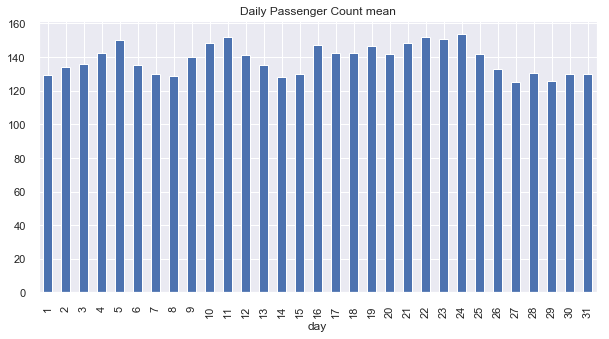

In [461]:
train.groupby('day')['Count'].mean().plot.bar(figsize=(10,5), title='Daily Passenger Count mean')


We cannot make any conclusion from the plot 

In [462]:
## During a week 
##0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.


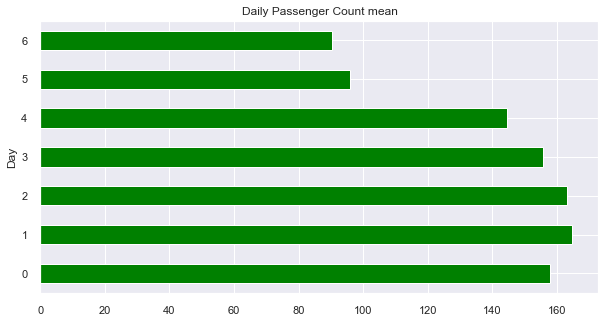

In [463]:
train.groupby('Day')['Count'].mean().plot.barh(figsize=(10,5), title='Daily Passenger Count mean', color='green')

We notice that the passenger count is less for saturday and sunday as compared to the other days of the week

###  Passenger Count by hours

We also made a hypothesis that the traffic will be higher during peak hours.


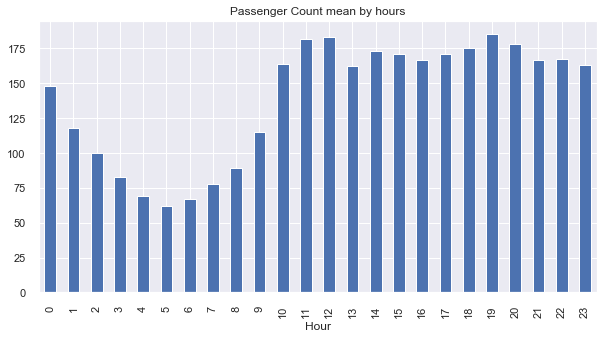

In [464]:
train.groupby('Hour')['Count'].mean().plot.bar(figsize=(10,5), title='Passenger Count mean by hours')

The peak traffic is at 7PM, then decreases until 5 AM
Another peak arises between 11AM and 12AM, which is the lunch break

###  Passenger Count on weekdays vs weekends

We also made a hypothesis that the traffic will be higher during the weekdays

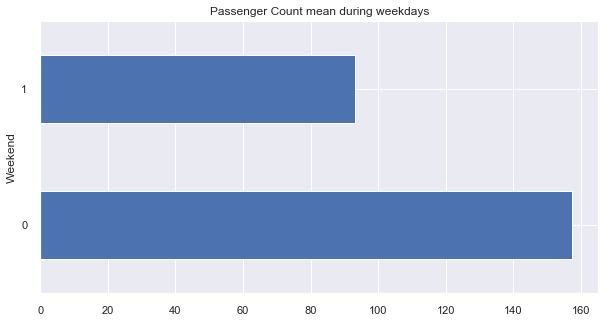

In [465]:
train.groupby('Weekend')['Count'].mean().plot.barh(figsize=(10,5),title='Passenger Count mean during weekdays')

The traffic is highr on weekdays as compared to weekends which validates our hypothesis.

Conclusion: 
- We see an exponential growth in the traffic over the years which validates our first hypothesis. (Decrease in 2014 because of the absence of the months 10,11,12 for 2013))
- We see a significant growth in the traffic between April and September during 2013 and 2014 
- We notice that the passenger count is less for saturday and sunday as compared to the other days of the week
- The peak traffic is at 7PM, then decreases until 5 AM. Another peak arises between 11AM and 12AM, which is the lunch break
- The traffic is higher on weekdays as compared to weekends which validates our hypothesis.

In [466]:
train.to_csv('train_processed.csv',index=False, date_format='%d-%m-%Y %H:%M')
test.to_csv('test_processed.csv', index=False, date_format='%d-%m-%Y %H:%M')